<a href="https://colab.research.google.com/github/AlexisDclqt/Code_Projet_Co2_/blob/main/Exploration_2024_Hybrides_Autres_Visualisations_Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pa

Visualisation 2024 Hybride.

In [54]:
df_emissions_2024_clean = pd.read_parquet('/content/drive/MyDrive/Data_Co2_Clean_AVEC_OUTLIERS_BEFORE_SAMPLE')
df_emissions_2024_clean.head(10)

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
0,148534149,FORD,FOCUS,1523.0,121.0,Essence,92.0,0.0,5.3,0.0,Netherlands,C,Q2_Moyen,Q2_Moyen
1,148534150,OPEL,VIVARO,2454.0,0.0,Electric,100.0,244.0,0.0,343.0,Netherlands,A,Q4_Très_lourd,Q2_Moyen
2,148534151,VOLVO,S60,2176.0,16.0,Hybride Essence,186.0,163.0,0.7,93.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
3,148534152,FORD,FOCUS,1549.0,123.0,Essence,92.0,0.0,5.4,0.0,Netherlands,C,Q2_Moyen,Q2_Moyen
4,148534153,TOYOTA,TOYOTA AYGO X,1088.0,108.0,Essence,53.0,0.0,4.8,0.0,Netherlands,B,Q1_Léger,Q1_Faible
5,148534154,DACIA,SANDERO,1262.0,125.0,Essence,81.0,0.0,5.5,0.0,Netherlands,C,Q1_Léger,Q2_Moyen
6,148534155,VOLKSWAGEN,TIGUAN,2033.0,10.0,Hybride Essence,110.0,178.0,0.4,117.0,Netherlands,A,Q4_Très_lourd,Q3_Puissant
7,148534156,VOLKSWAGEN,TAIGO,1335.0,125.0,Essence,70.0,0.0,5.6,0.0,Netherlands,C,Q1_Léger,Q1_Faible
8,148534157,VOLVO,C40,2203.0,0.0,Electric,185.0,166.0,0.0,570.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
9,148534158,VOLVO,XC60,2272.0,22.0,Hybride Essence,186.0,182.0,0.9,82.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant


In [55]:
valeurs_distinctes = df_emissions_2024_clean['Type_Carburant'].unique()
print(valeurs_distinctes)

['Essence' 'Electric' 'Hybride Essence' 'Autre' 'Hybride Diesel' 'Diesel']


In [56]:
df_emissions_2024_hybride = df_emissions_2024_clean[(df_emissions_2024_clean['Type_Carburant'] == 'Hybride Essence') | (df_emissions_2024_clean['Type_Carburant'] == 'Hybride Diesel')]
df_emissions_2024_hybride.head(10)

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
2,148534151,VOLVO,S60,2176.0,16.0,Hybride Essence,186.0,163.0,0.7,93.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
6,148534155,VOLKSWAGEN,TIGUAN,2033.0,10.0,Hybride Essence,110.0,178.0,0.4,117.0,Netherlands,A,Q4_Très_lourd,Q3_Puissant
9,148534158,VOLVO,XC60,2272.0,22.0,Hybride Essence,186.0,182.0,0.9,82.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
17,148534166,SKODA,KODIAQ,2061.0,10.0,Hybride Essence,110.0,176.0,0.5,114.0,Netherlands,A,Q4_Très_lourd,Q3_Puissant
21,148534170,MERCEDES-BENZ,C 300 E,2305.0,14.0,Hybride Essence,150.0,191.0,0.6,110.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
38,148534187,BMW,XM,2904.0,43.0,Hybride Essence,360.0,335.0,1.9,76.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
41,148534190,BMW,530E,2286.0,17.0,Hybride Essence,140.0,211.0,0.8,92.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
45,148534194,MERCEDES-BENZ,E 300 E,2461.0,14.0,Hybride Essence,150.0,196.0,0.6,108.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
46,148534195,BMW,320E,1934.0,30.0,Hybride Essence,120.0,159.0,1.3,62.0,Netherlands,A,Q4_Très_lourd,Q3_Puissant
47,148534196,OPEL,ASTRA SPORTS TOURER,1843.0,30.0,Hybride Essence,110.0,164.0,1.3,57.0,Netherlands,A,Q3_Lourd,Q3_Puissant


In [57]:
display(df_emissions_2024_hybride.info())

<class 'pandas.core.frame.DataFrame'>
Index: 683494 entries, 2 to 10117211
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    683494 non-null  int64  
 1   Constructeur          683494 non-null  object 
 2   Model                 683494 non-null  object 
 3   WLTP_poids            683494 non-null  float64
 4   Co2_Emission(WLTP)    683494 non-null  float64
 5   Type_Carburant        683494 non-null  object 
 6   Puissance_KW          683494 non-null  float64
 7   Conso_Wh/km           683494 non-null  float64
 8   Fuel consumption      683494 non-null  float64
 9   Electric range (km)   683494 non-null  float64
 10  Pays                  683494 non-null  object 
 11  Etiquette_CO2         683494 non-null  object 
 12  Poids_Quartile        683494 non-null  object 
 13  PuissanceKW_Quartile  683494 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 78.2+ 

None

In [58]:
missing_rate = df_emissions_2024_hybride.isna().mean() * 100
print(missing_rate)

ID                      0.0
Constructeur            0.0
Model                   0.0
WLTP_poids              0.0
Co2_Emission(WLTP)      0.0
Type_Carburant          0.0
Puissance_KW            0.0
Conso_Wh/km             0.0
Fuel consumption        0.0
Electric range (km)     0.0
Pays                    0.0
Etiquette_CO2           0.0
Poids_Quartile          0.0
PuissanceKW_Quartile    0.0
dtype: float64


In [59]:
df_emissions_2024_hybride_clean = df_emissions_2024_hybride.dropna()
print(df_emissions_2024_hybride_clean.isna().sum())

ID                      0
Constructeur            0
Model                   0
WLTP_poids              0
Co2_Emission(WLTP)      0
Type_Carburant          0
Puissance_KW            0
Conso_Wh/km             0
Fuel consumption        0
Electric range (km)     0
Pays                    0
Etiquette_CO2           0
Poids_Quartile          0
PuissanceKW_Quartile    0
dtype: int64


In [60]:
# check pour valuers dupliquées
df_emissions_2024_hybride_clean.duplicated().sum()

np.int64(0)

In [61]:
df_emissions_2024_hybride_clean.isnull().sum(axis=0)

,0
ID,0
Constructeur,0
Model,0
WLTP_poids,0
Co2_Emission(WLTP),0
Type_Carburant,0
Puissance_KW,0
Conso_Wh/km,0
Fuel consumption,0
Electric range (km),0


In [62]:
variables_etudiees = ['WLTP_poids', 'Co2_Emission(WLTP)','Puissance_KW', 'Conso_Wh/km', 'Fuel consumption' , 'Electric range (km)']
df_emissions_2024_hybride_clean[variables_etudiees].describe()

,WLTP_poids,Co2_Emission(WLTP),Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km)
count,683494.000000,683494.000000,683494.000000,683494.000000,683494.000000,683494.000000
mean,2197.086431,26.203570,153.339707,193.482273,1.403341,78.149603
std,316.089094,16.525867,61.688537,42.360448,1.478565,24.418156
min,1084.000000,6.000000,15.000000,0.000000,0.000000,0.000000
25%,1950.000000,18.000000,110.000000,168.000000,0.800000,61.000000
50%,2159.000000,24.000000,135.000000,184.000000,1.100000,74.000000
75%,2386.000000,32.000000,186.000000,210.000000,1.400000,91.000000
max,3960.000000,404.000000,607.000000,430.000000,26.000000,702.000000


In [63]:
# selection de colonnes avec minimums à zero
cols = ['Conso_Wh/km', 'Fuel consumption', 'Electric range (km)']
# count des valeurs zero
count_zero_values = (df_emissions_2024_hybride_clean[cols] == 0).sum()
print(count_zero_values)
# drop des valeurs zero
df_emissions_2024_hybride_clean2 = df_emissions_2024_hybride_clean[(df_emissions_2024_hybride_clean[cols] != 0).all(axis=1)]
#check
count_zero_values_clean = (df_emissions_2024_hybride_clean2[cols] == 0).any(axis=1).sum()
print(count_zero_values_clean)

Conso_Wh/km            1243
Fuel consumption        213
Electric range (km)    1418
dtype: int64
0


In [64]:
variables_etudiees = ['WLTP_poids', 'Co2_Emission(WLTP)','Puissance_KW', 'Conso_Wh/km', 'Fuel consumption' , 'Electric range (km)']
df_emissions_2024_hybride_clean2[variables_etudiees].describe()

,WLTP_poids,Co2_Emission(WLTP),Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km)
count,681863.000000,681863.000000,681863.000000,681863.000000,681863.000000,681863.000000
mean,2196.486737,25.943566,153.267038,193.817516,1.393335,78.299012
std,315.834672,15.217446,61.683223,41.585016,1.459109,24.173898
min,1084.000000,6.000000,15.000000,14.000000,0.100000,11.000000
25%,1949.000000,18.000000,110.000000,168.000000,0.800000,61.000000
50%,2159.000000,24.000000,135.000000,184.000000,1.100000,74.000000
75%,2384.000000,32.000000,186.000000,210.000000,1.400000,91.000000
max,3960.000000,404.000000,607.000000,430.000000,26.000000,702.000000


Identification des variables a étudiées:

Liste de variables a etudier pour diesel ou essence/ELectric ( véhicules hybrides).

- WLTP_Poids
- CO2_Emmision(WLTP)
- Puisssance_Kw
- Conso_Wh/km
- Fuel consumption
- Electric range (km)




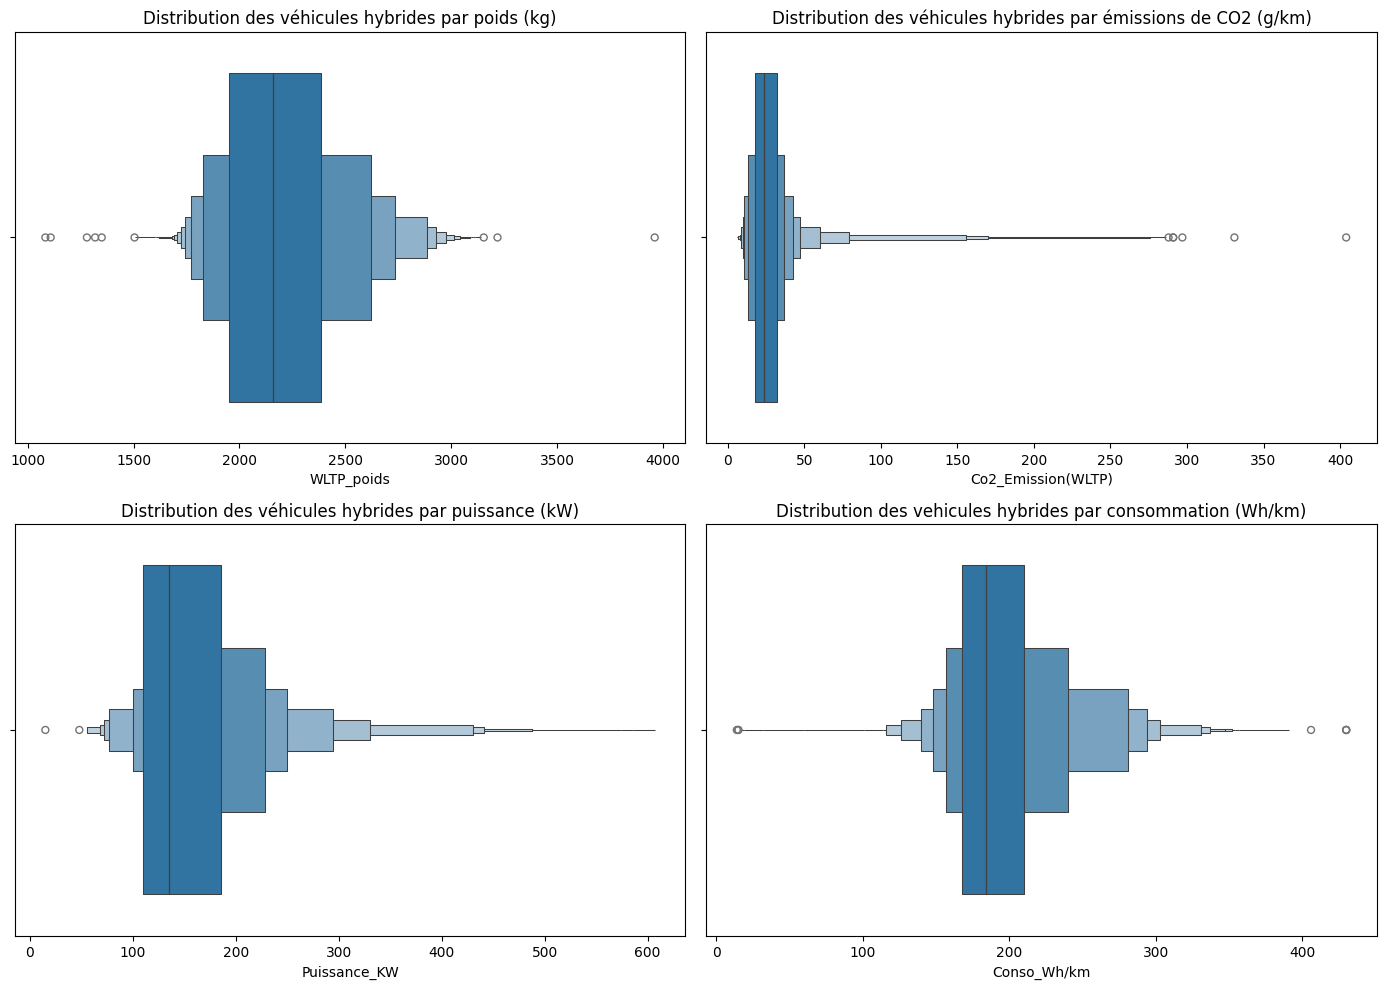

In [65]:
colonnes = ['WLTP_poids', 'Co2_Emission(WLTP)', 'Puissance_KW','Conso_Wh/km']
titres = [
    'Distribution des véhicules hybrides par poids (kg)',
    'Distribution des véhicules hybrides par émissions de CO2 (g/km)',
    'Distribution des véhicules hybrides par puissance (kW)',
    'Distribution des vehicules hybrides par consommation (Wh/km)'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.boxenplot(x=col, data=df_emissions_2024_hybride_clean2, ax=axes[i])
    axes[i].set_title(titres[i])

plt.tight_layout()
plt.show()

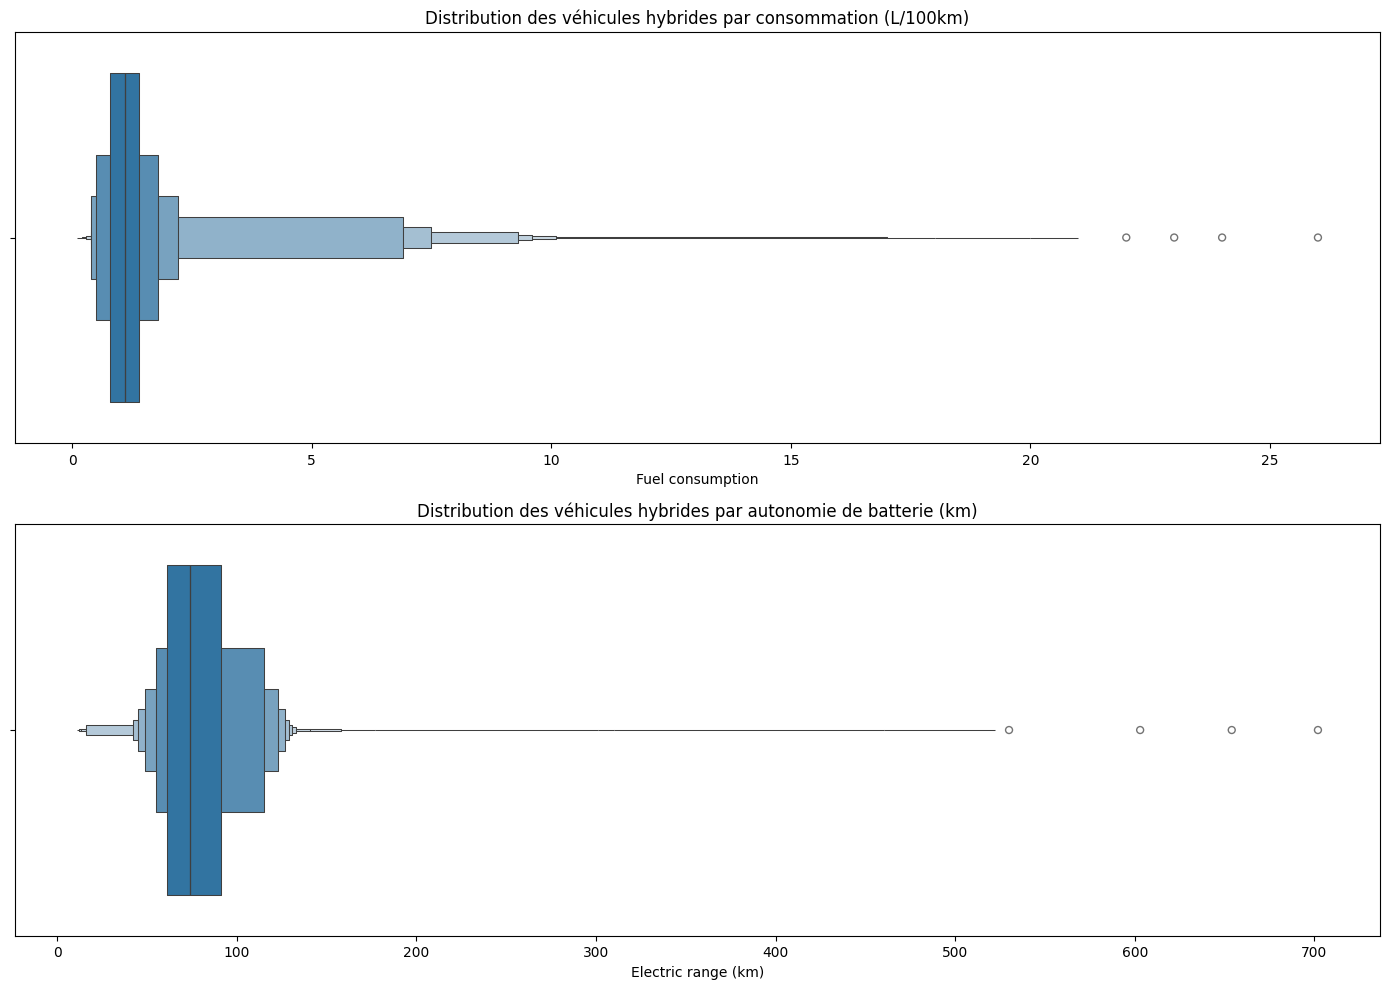

In [66]:
colonnes = ['Fuel consumption', 'Electric range (km)']
titres = [
    'Distribution des véhicules hybrides par consommation (L/100km)',
    'Distribution des véhicules hybrides par autonomie de batterie (km)'
]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.boxenplot(x=col, data=df_emissions_2024_hybride_clean2, ax=axes[i])
    axes[i].set_title(titres[i])

plt.tight_layout()
plt.show()

RECHERCHE DES OUTLIERS:


In [67]:
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Co2_Emission(WLTP)'] >= 300)]
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Co2_Emission(WLTP)'] >= 250) & (df_emissions_2024_hybride_clean2['Co2_Emission(WLTP)'] < 300)]
# les outliers pour les vehicules hybride dont les emissions de CO₂ sont haute semble etre de valerus réels ( voiture de sport) on va donc les garder.


,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
35211,148469378,LAMBORGHINI,REVUELTO,2131.0,276.0,Hybride Essence,607.0,101.0,11.9,13.0,Netherlands,G,Q4_Très_lourd,Q4_Très_Puissant
68549,142143440,LAMBORGHINI,REVUELTO,2131.0,276.0,Hybride Essence,607.0,101.0,11.9,13.0,Sweden,G,Q4_Très_lourd,Q4_Très_Puissant
92108,142168692,LAMBORGHINI,REVUELTO,2131.0,276.0,Hybride Essence,607.0,101.0,11.9,13.0,Sweden,G,Q4_Très_lourd,Q4_Très_Puissant
105067,142182575,LAMBORGHINI,REVUELTO,2131.0,276.0,Hybride Essence,607.0,101.0,11.9,13.0,Sweden,G,Q4_Très_lourd,Q4_Très_Puissant
122074,148750249,LAMBORGHINI,REVUELTO,2131.0,276.0,Hybride Essence,607.0,101.0,11.9,13.0,Netherlands,G,Q4_Très_lourd,Q4_Très_Puissant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041625,156649816,BMW,XM LABEL,2895.0,281.0,Hybride Essence,430.0,331.0,7.3,79.0,Romania,G,Q4_Très_lourd,Q4_Très_Puissant
8049335,156672930,FERRARI,SF90 SPIDER,2001.0,288.0,Hybride Essence,574.0,249.0,12.7,235.0,Bulgaria,G,Q4_Très_lourd,Q4_Très_Puissant
8075179,156698953,LAND ROVER,RANGE ROVER SPORT,3040.0,297.0,Hybride Essence,294.0,283.0,9.7,122.0,Bulgaria,G,Q4_Très_lourd,Q4_Très_Puissant
8103936,156522704,LAMBORGHINI,REVUELTO,2131.0,276.0,Hybride Essence,607.0,101.0,7.3,13.0,Romania,G,Q4_Très_lourd,Q4_Très_Puissant


In [68]:
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['WLTP_poids'] < 1500)]
# la hyundai tuscon 149634880	 est une valeur aberrante car d'aprés une recheche internet le poids est en realité superieur a celui indiqué donc c'est une valeur aberrante a drop.
# idem pour la toyota chr 149652700
# idem pour volvo XC60 149747021
# dacia spring fait bien le poids indiquer voir plus
# porsche cayenne valeur aberrante 157563567

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
2646834,149634880,HYUNDAI,TUCSON IX35,1350.0,31.0,Hybride Essence,132.0,177.0,14.0,62.0,Greece,A,Q1_Léger,Q4_Très_Puissant
2648503,149652700,TOYOTA,TOYOTA C-HR,1084.0,19.0,Hybride Essence,111.0,151.0,8.0,66.0,Greece,A,Q1_Léger,Q3_Puissant
2652727,149747021,VOLVO,XC60,1319.0,25.0,Hybride Essence,228.0,184.0,11.0,75.0,Greece,A,Q1_Léger,Q4_Très_Puissant
3719545,152933274,DACIA,SPRING,1109.0,16.0,Hybride Essence,48.0,147.0,1.0,65.0,Hungary,A,Q1_Léger,Q1_Faible
9360576,157563567,PORSCHE,CAYENNE E-HYBRID,1280.0,50.0,Hybride Essence,224.0,32.0,1.6,74.0,Malta,A,Q1_Léger,Q4_Très_Puissant


In [69]:
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['WLTP_poids'] > 3500)]
# valeur aberrante la voiture ne fait pas ce poids en realité

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
8047465,156671046,WEY,COFFEE 01,3960.0,182.0,Hybride Essence,150.0,158.0,8.0,250.0,Bulgaria,E,Q4_Très_lourd,Q4_Très_Puissant


In [70]:
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['WLTP_poids'] > 3200)].sort_values(by='WLTP_poids', ascending=True)
# 145535530 ID a drop car valeur aberrante



,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
2226188,145535530,MERCEDES-BENZ,E 300 DE,3218.0,36.0,Hybride Diesel,143.0,289.0,1.4,455.0,France,A,Q4_Très_lourd,Q4_Très_Puissant
8047465,156671046,WEY,COFFEE 01,3960.0,182.0,Hybride Essence,150.0,158.0,8.0,250.0,Bulgaria,E,Q4_Très_lourd,Q4_Très_Puissant


In [71]:
# recherche outlier puissance.
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Puissance_KW'] <= 50)]
# TOYOTA RAV4 valeur a supprimer après recherhce internet. 147678770
# Dacia spring a garder.


,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
1896830,147678770,TOYOTA,TOYOTA RAV4,2162.0,22.0,Hybride Essence,15.0,171.0,6.6,75.0,Spain,A,Q4_Très_lourd,Q1_Faible
3719545,152933274,DACIA,SPRING,1109.0,16.0,Hybride Essence,48.0,147.0,1.0,65.0,Hungary,A,Q1_Léger,Q1_Faible


In [72]:
# recherche outlier boite a moustache consomation Wh/km
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Conso_Wh/km'] < 15)]
# bmw à garder car la consomation en wh/km se raproche de celle en réalité donc c'est une valeur réelle
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Conso_Wh/km'] > 400)]
# les valeurs au dessus de 400 Wh/km sont des valeurs aberrantes a drop.

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
4034413,150790693,MERCEDES-BENZ,AMG C 63 S E PERFORMANCE,2430.0,167.0,Hybride Essence,350.0,430.0,7.3,11.0,Germany,E,Q4_Très_lourd,Q4_Très_Puissant
5262989,137628815,MCLAREN,ARTURA COUPE,1667.0,104.0,Hybride Essence,430.0,406.0,4.6,30.0,Finland,B,Q3_Lourd,Q4_Très_Puissant
6411512,142114922,MERCEDES-BENZ,AMG C 63 S E PERFORMANCE,2430.0,167.0,Hybride Essence,350.0,430.0,7.3,11.0,Sweden,E,Q4_Très_lourd,Q4_Très_Puissant
6922695,150153621,MERCEDES-BENZ,AMG C 63 S E PERFORMANCE,2430.0,167.0,Hybride Essence,350.0,430.0,7.3,11.0,Germany,E,Q4_Très_lourd,Q4_Très_Puissant


In [73]:
# recherche outlier pour fuel consumption.
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Fuel consumption'] > 20)]
# au dessus de 20l/100km on a des valeurs aberrantes selon recherhce internet des motorisations, a drop

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
2648277,149650113,BMW,X3 XDRIVE30E,2216.0,47.0,Hybride Essence,135.0,258.0,21.0,42.0,Greece,A,Q4_Très_lourd,Q4_Très_Puissant
2649563,149713733,AUDI,Q8 60 TFSI E,2641.0,52.0,Hybride Essence,250.0,241.0,23.0,49.0,Greece,A,Q4_Très_lourd,Q4_Très_Puissant
2650293,149721527,BMW,X3 XDRIVE30E,2209.0,47.0,Hybride Essence,135.0,192.0,21.0,42.0,Greece,A,Q4_Très_lourd,Q4_Très_Puissant
2652179,149741385,JEEP,COMPASS,2058.0,49.0,Hybride Essence,132.0,178.0,21.0,42.0,Greece,A,Q4_Très_lourd,Q4_Très_Puissant
2652370,149743393,JEEP,GRAND CHEROKEE,2700.0,60.0,Hybride Essence,200.0,230.0,26.0,39.0,Greece,A,Q4_Très_lourd,Q4_Très_Puissant
2656528,149687274,BMW,X3 XDRIVE30E,2195.0,50.0,Hybride Essence,135.0,219.0,22.0,42.0,Greece,A,Q4_Très_lourd,Q4_Très_Puissant
2656982,149691880,BMW,X3 XDRIVE30E,2146.0,47.0,Hybride Essence,135.0,216.0,21.0,43.0,Greece,A,Q4_Très_lourd,Q4_Très_Puissant
2657231,149694397,JEEP,RENEGADE,1963.0,54.0,Hybride Essence,132.0,189.0,24.0,40.0,Greece,A,Q4_Très_lourd,Q4_Très_Puissant


In [74]:
# recherhe outliers autonomie de batterie
df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Electric range (km)'] > 500)]
# toute sont des valeurs aberrantes a drop.

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
1506076,146545002,VOLKSWAGEN,TIGUAN,1978.0,33.0,Hybride Essence,110.0,222.0,1.4,530.0,France,A,Q4_Très_lourd,Q3_Puissant
2152923,145195260,MINI,COUNTRYMAN COOPER SE ALL4,1902.0,41.0,Hybride Essence,92.0,173.0,1.8,522.0,France,A,Q4_Très_lourd,Q2_Moyen
2601737,149163317,AUDI,A6 AVANT 50 TFSI E,2291.0,35.0,Hybride Essence,195.0,209.0,1.5,603.0,Estonia,A,Q4_Très_lourd,Q4_Très_Puissant
2655625,149677486,MG,MG RX6 PLUG-IN HYBRID MG HS P,1923.0,43.0,Hybride Essence,119.0,240.0,18.0,520.0,Greece,A,Q4_Très_lourd,Q3_Puissant
4454401,146474078,VOLKSWAGEN,TIGUAN,1915.0,32.0,Hybride Essence,110.0,150.0,1.4,503.0,France,A,Q4_Très_lourd,Q3_Puissant
5075970,146836169,MINI,COUNTRYMAN COOPER SE ALL4,1931.0,41.0,Hybride Essence,92.0,173.0,1.8,522.0,France,A,Q4_Très_lourd,Q2_Moyen
5772746,145719965,MINI,COUNTRYMAN COOPER SE ALL4,1944.0,42.0,Hybride Essence,92.0,173.0,1.8,522.0,France,A,Q4_Très_lourd,Q2_Moyen
6247903,146372644,MINI,COUNTRYMAN COOPER SE ALL4,1918.0,41.0,Hybride Essence,92.0,125.0,1.8,702.0,France,A,Q4_Très_lourd,Q2_Moyen
8060159,156683826,VOLVO,XC90,2512.0,177.0,Hybride Essence,228.0,212.0,7.8,654.0,Bulgaria,E,Q4_Très_lourd,Q4_Très_Puissant


In [75]:
# NETTOYAGE DES OUTLIERS WLTP poids
df_emissions_2024_hybride_clean2=df_emissions_2024_hybride_clean2.drop(df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['ID'] == 149634880) | (df_emissions_2024_hybride_clean2['ID'] == 149652700) | (df_emissions_2024_hybride_clean2['ID'] == 149747021) | (df_emissions_2024_hybride_clean2['ID'] == 157563567) | (df_emissions_2024_hybride_clean2['ID'] ==145535530)].index)
df_emissions_2024_hybride_clean2=df_emissions_2024_hybride_clean2.drop(df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['WLTP_poids'] > 3500)].index)
# nettoyage des outliers puissance kw
df_emissions_2024_hybride_clean2=df_emissions_2024_hybride_clean2.drop(df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['ID'] == 149634880)].index)
# nettoyage des outliers conso wh/km
df_emissions_2024_hybride_clean2=df_emissions_2024_hybride_clean2.drop(df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Conso_Wh/km'] > 400)].index)
# nettoyage outliers fuel consomption
df_emissions_2024_hybride_clean2=df_emissions_2024_hybride_clean2.drop(df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Fuel consumption'] > 20)].index)
# nettoyage des outliers electric range
df_emissions_2024_hybride_clean2=df_emissions_2024_hybride_clean2.drop(df_emissions_2024_hybride_clean2[(df_emissions_2024_hybride_clean2['Electric range (km)'] > 500)].index)


# Analyse des boites a moustaches et nettoyage des outliers.

**Poids**

Il y a plusieurs valeurs aberrantes dans la colonne WLTP Poids. Plusieurs voitures sont bien au dessus de la valeur indiqué par le dataset. Un certain nombre de voiture font plus que le poids indiquer par des recherhces google mais ne sont pas des outliers du dataset. Il faut donc remettre en question la fiabilité des recherches ou la surepresentation du poids des vehicules. Ici on accorde la disparité a la presence du moteur hybride qui fait augmenter le poids des véhicules

**Emissions de CO2**

les outliers pour les vehicules hybride dont les emissions de CO₂ sont haute ( superieur a 250) semble etre de valeurs réels ( voiture de sport) on va donc les garder.

**Puissance KW**

On remarque la présence d'outlier pour des puissances inférieures à 50KW. Aprés de rapide recherches internet on supprime une des valeurs et on garde la Dacia Spring avec une puissance de 48 KW est bien réel

**Consommation (Wh/km)**

On remarque la présence d'outliers a des valuers en dessous de 15wh/km. et au dessus de 400wh/km. La valeur en dessous de 15wh/km représente bien une voiture réel tandis que les véhicules au dessus de 400wh/km sont aberrantes. Une indication de comment cette valeur est calculé serait apprecie car ont trouve des valeurs trés etendus et hautes.

**Consommation (L/100KM)**

On remarque la présence de outliers à plus de 20l/100km. Ce sont bien des valeurs aberrantes qu'on va drop du dataframe.  

**autonomie de batterie**

On remarque la presence d'outlier au dessus de 500km d'autonomie de batterie. ce sont des valeurs aberrantes que l'on va drop du dataframe.




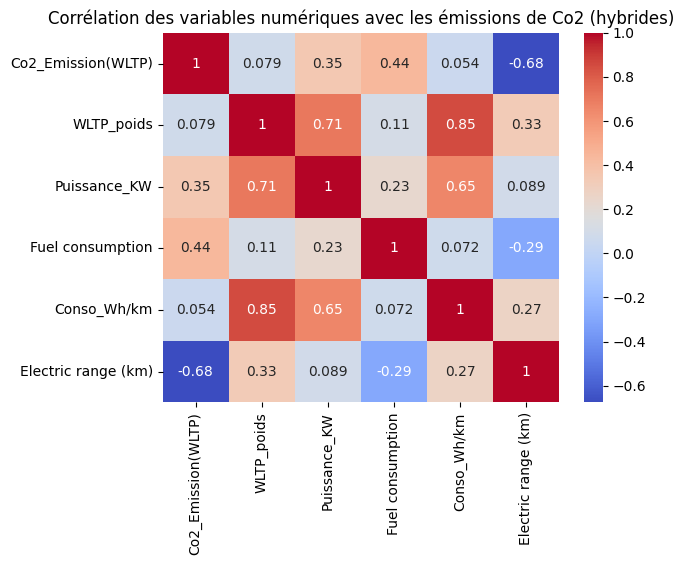

In [76]:
# Matrice de corrélation (heatmap) entre les variables numériques pour voitures hybrides

numeric_vars = ['Co2_Emission(WLTP)', 'WLTP_poids', 'Puissance_KW', 'Fuel consumption', 'Conso_Wh/km', 'Electric range (km)' ]
corr_matrix = df_emissions_2024_hybride_clean2[numeric_vars].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation des variables numériques avec les émissions de Co2 (hybrides)')
plt.show()

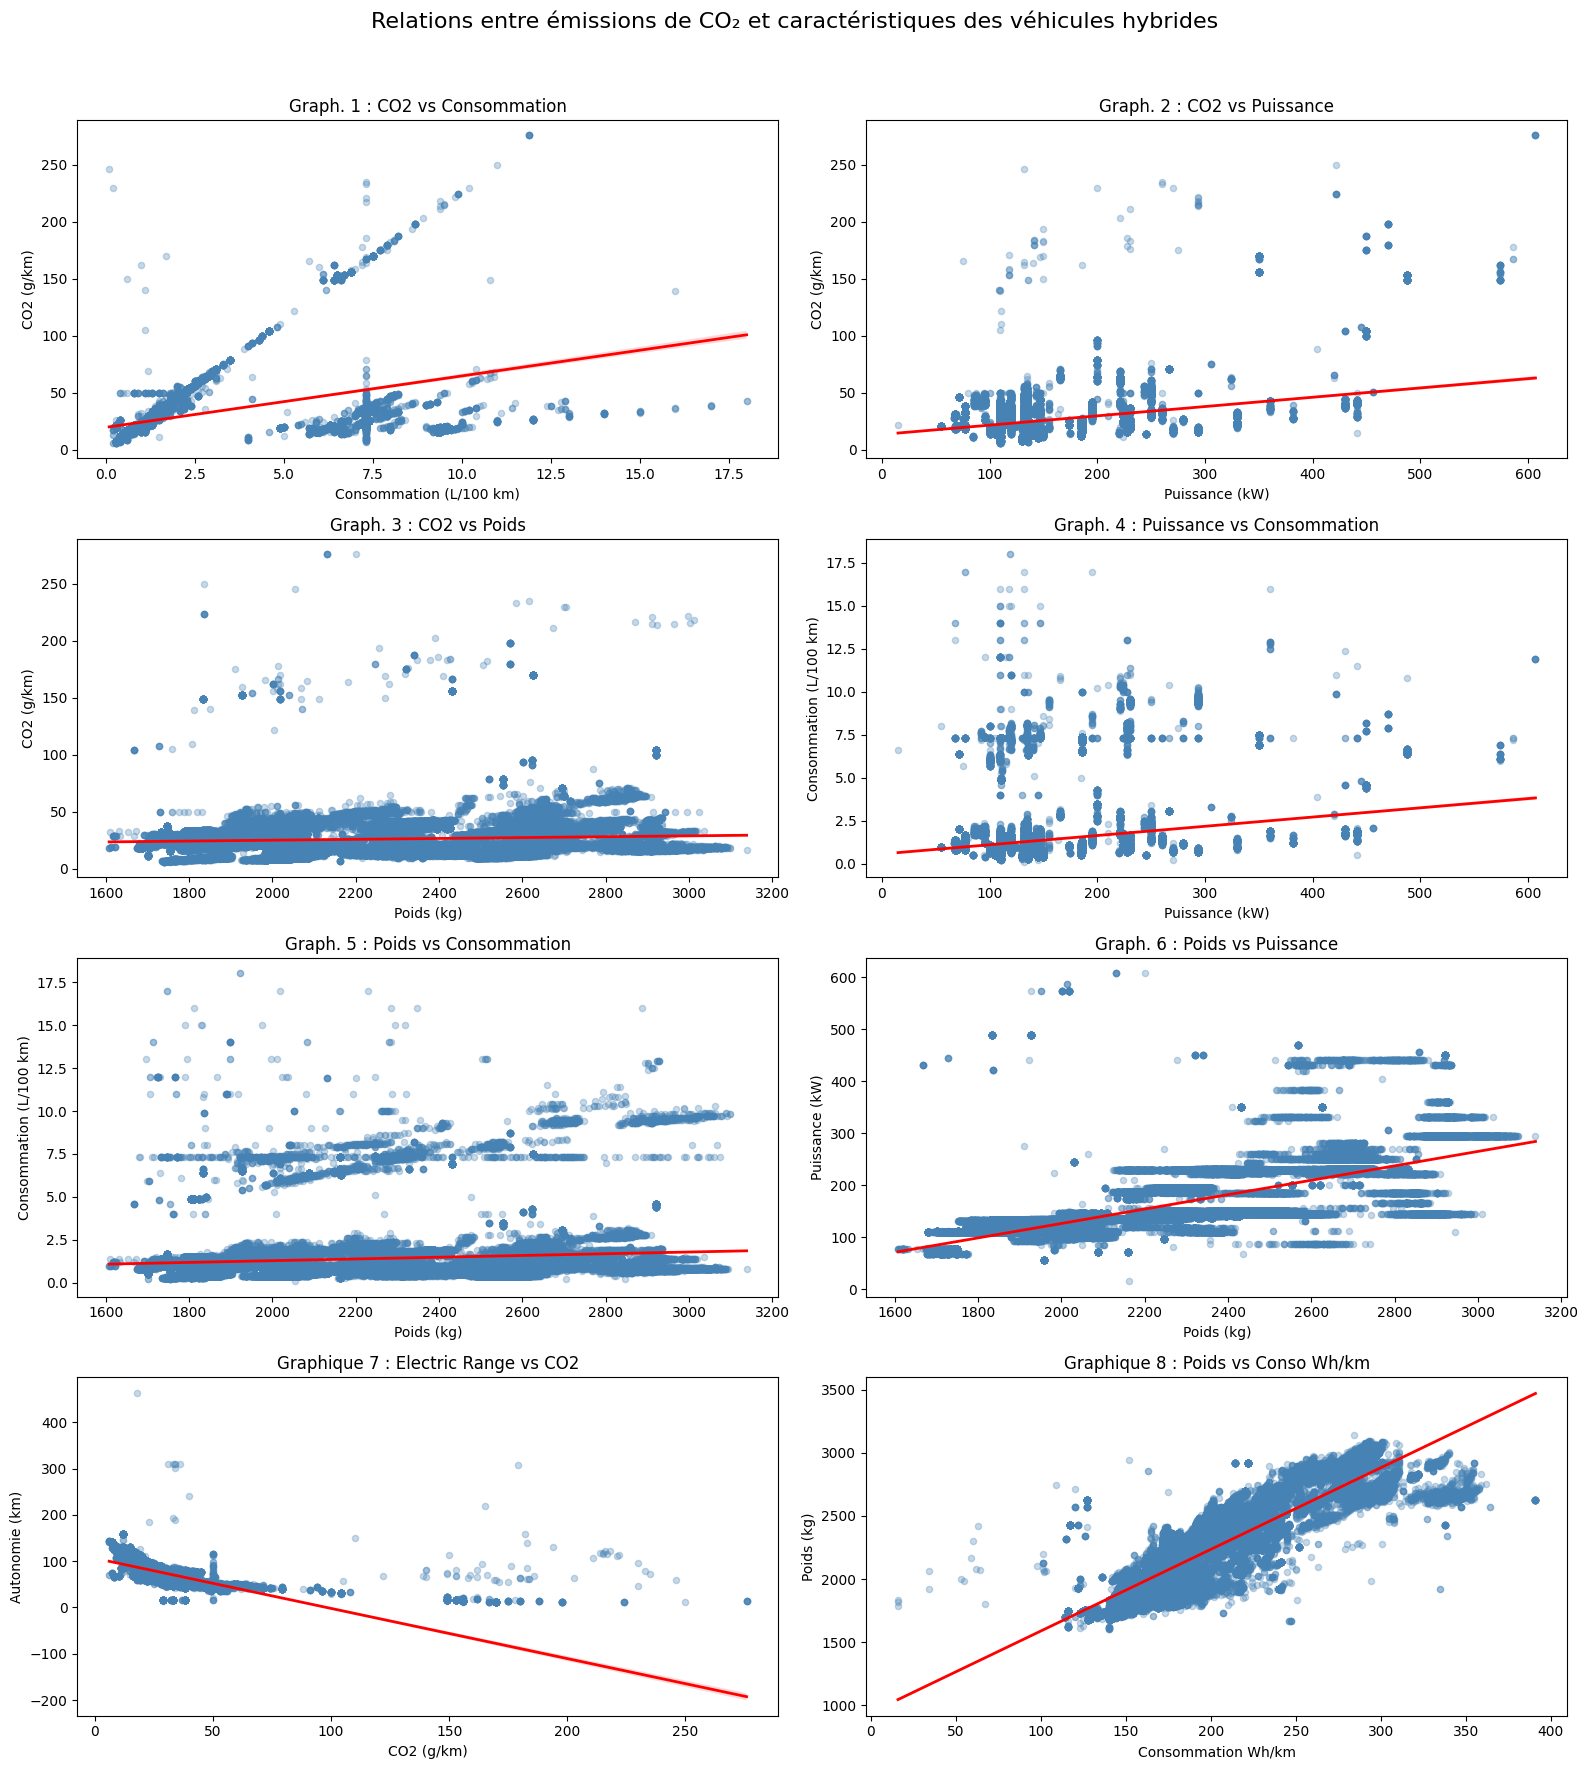

In [77]:
#Nuages de points avec droite de régression linéaire pour les véhicules hybrides

df_sample = df_emissions_2024_hybride_clean2.sample(100000)

# Création de la figure et de la grille
fig, axes = plt.subplots(4, 2, figsize=(16, 18))

fig.suptitle(
    "Relations entre émissions de CO₂ et caractéristiques des véhicules hybrides",
    fontsize=16
)

# Graphique 1 : CO2 vs Consommation
sns.regplot(
    x='Fuel consumption',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 0]
)
axes[0, 0].set_title('Graph. 1 : CO2 vs Consommation')
axes[0, 0].set_xlabel('Consommation (L/100 km)')
axes[0, 0].set_ylabel('CO2 (g/km)')

# Graphique 2 : CO2 vs Puissance
sns.regplot(
    x='Puissance_KW',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 1]
)
axes[0, 1].set_title('Graph. 2 : CO2 vs Puissance')
axes[0, 1].set_xlabel('Puissance (kW)')
axes[0, 1].set_ylabel('CO2 (g/km)')

# Graphique 3 : CO2 vs Poids
sns.regplot(
    x='WLTP_poids',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 0]
)
axes[1, 0].set_title('Graph. 3 : CO2 vs Poids')
axes[1, 0].set_xlabel('Poids (kg)')
axes[1, 0].set_ylabel('CO2 (g/km)')

# Graphique 4 : Puissance vs Consommation
sns.regplot(
    x='Puissance_KW',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 1]
)
axes[1, 1].set_title('Graph. 4 : Puissance vs Consommation')
axes[1, 1].set_xlabel('Puissance (kW)')
axes[1, 1].set_ylabel('Consommation (L/100 km)')

# Graphique 5 : Poids vs Consommation

sns.regplot(
    x='WLTP_poids',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 0]
)
axes[2, 0].set_title('Graph. 5 : Poids vs Consommation')
axes[2, 0].set_xlabel('Poids (kg)')
axes[2, 0].set_ylabel('Consommation (L/100 km)')

# Graphique 6 : Poids vs Puissance
sns.regplot(
    x='WLTP_poids',
    y='Puissance_KW',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 1]
)
axes[2, 1].set_title('Graph. 6 : Poids vs Puissance')
axes[2, 1].set_xlabel('Poids (kg)')
axes[2, 1].set_ylabel('Puissance (kW)')

# Graphique 7 : Electric Range vs CO2
sns.regplot(
    x='Co2_Emission(WLTP)',
    y='Electric range (km)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[3, 0]
)
axes[3, 0].set_title('Graphique 7 : Electric Range vs CO2')
axes[3, 0].set_xlabel('CO2 (g/km)')
axes[3, 0].set_ylabel('Autonomie (km)')
# Graphique 8 : Poids vs Conso Wh/km
sns.regplot(
    x='Conso_Wh/km',
    y='WLTP_poids',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[3, 1]
)
axes[3, 1].set_title('Graphique 8 : Poids vs Conso Wh/km')
axes[3, 1].set_xlabel('Consommation Wh/km')
axes[3, 1].set_ylabel('Poids (kg)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Visualisation 2024 Autres type de carburants

In [78]:
df_emissions_2024_autres = df_emissions_2024_clean[(df_emissions_2024_clean['Type_Carburant'] == 'Autre')]
df_emissions_2024_autres.head(10)

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
152,148534301,DACIA,SANDERO,1310.0,114.0,Autre,74.0,0.0,7.1,0.0,Netherlands,B,Q1_Léger,Q1_Faible
191,148534340,DACIA,JOGGER,1461.0,120.0,Autre,74.0,0.0,7.8,0.0,Netherlands,B,Q2_Moyen,Q1_Faible
330,148534479,DACIA,SANDERO,1284.0,106.0,Autre,74.0,0.0,6.6,0.0,Netherlands,B,Q1_Léger,Q1_Faible
583,148534732,DACIA,SANDERO,1285.0,106.0,Autre,74.0,0.0,6.6,0.0,Netherlands,B,Q1_Léger,Q1_Faible
713,148534862,DACIA,JOGGER,1407.0,119.0,Autre,74.0,0.0,7.7,0.0,Netherlands,B,Q2_Moyen,Q1_Faible
716,148534865,DACIA,JOGGER,1460.0,120.0,Autre,74.0,0.0,7.8,0.0,Netherlands,B,Q2_Moyen,Q1_Faible
1060,148535209,DACIA,SANDERO,1285.0,106.0,Autre,74.0,0.0,6.6,0.0,Netherlands,B,Q1_Léger,Q1_Faible
1210,148535359,DACIA,SANDERO,1310.0,114.0,Autre,74.0,0.0,7.1,0.0,Netherlands,B,Q1_Léger,Q1_Faible
1425,148535574,DACIA,SANDERO,1308.0,114.0,Autre,74.0,0.0,7.1,0.0,Netherlands,B,Q1_Léger,Q1_Faible
1466,148535615,DACIA,SANDERO,1285.0,106.0,Autre,74.0,0.0,6.6,0.0,Netherlands,B,Q1_Léger,Q1_Faible


In [79]:
display(df_emissions_2024_autres.info())

<class 'pandas.core.frame.DataFrame'>
Index: 323001 entries, 152 to 10117127
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    323001 non-null  int64  
 1   Constructeur          323001 non-null  object 
 2   Model                 323001 non-null  object 
 3   WLTP_poids            323001 non-null  float64
 4   Co2_Emission(WLTP)    323001 non-null  float64
 5   Type_Carburant        323001 non-null  object 
 6   Puissance_KW          323001 non-null  float64
 7   Conso_Wh/km           323001 non-null  float64
 8   Fuel consumption      323001 non-null  float64
 9   Electric range (km)   323001 non-null  float64
 10  Pays                  323001 non-null  object 
 11  Etiquette_CO2         323001 non-null  object 
 12  Poids_Quartile        323001 non-null  object 
 13  PuissanceKW_Quartile  323001 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 37.0

None

In [80]:
missing_rate = df_emissions_2024_autres.isna().mean()
missing_rate

,0
ID,0.0
Constructeur,0.0
Model,0.0
WLTP_poids,0.0
Co2_Emission(WLTP),0.0
Type_Carburant,0.0
Puissance_KW,0.0
Conso_Wh/km,0.0
Fuel consumption,0.0
Electric range (km),0.0


In [81]:
df_emissions_2024_hybride.isnull().sum(axis=0)

,0
ID,0
Constructeur,0
Model,0
WLTP_poids,0
Co2_Emission(WLTP),0
Type_Carburant,0
Puissance_KW,0
Conso_Wh/km,0
Fuel consumption,0
Electric range (km),0


Identification des variables a étudiées:

Liste de variables à étudier pour véhicules à autres types de carburants

WLTP_Poids

CO2_Emmision(WLTP)

Conso_Wh/km

Fuel consumption


In [82]:
variables_etudiees_autres = ['WLTP_poids', 'Co2_Emission(WLTP)','Puissance_KW', 'Fuel consumption']
df_emissions_2024_autres[variables_etudiees_autres].describe()

,WLTP_poids,Co2_Emission(WLTP),Puissance_KW,Fuel consumption
count,323001.000000,323001.000000,323001.000000,323001.000000
mean,1369.728834,119.723540,73.094387,6.321587
std,101.437643,14.917109,11.233485,1.156461
min,1089.000000,0.000000,31.000000,0.000000
25%,1304.000000,113.000000,67.000000,5.700000
50%,1319.000000,116.000000,74.000000,6.100000
75%,1451.000000,126.000000,74.000000,7.100000
max,3200.000000,274.000000,150.000000,17.000000


In [83]:
# Selection de colonnes avec zero
cols_2 = ['Co2_Emission(WLTP)', 'Fuel consumption']
# count de valeurs zero
count_zero_values = (df_emissions_2024_autres[cols_2] == 0).sum()
print(count_zero_values)
# drop des valeurs egales à zero
df_emissions_2024_autres_clean = df_emissions_2024_autres[(df_emissions_2024_autres[cols_2] != 0).all(axis=1)]
# check
count_zero_values_clean = (df_emissions_2024_autres_clean[cols_2] == 0).any(axis=1).sum()
print(count_zero_values_clean)


Co2_Emission(WLTP)     717
Fuel consumption      4931
dtype: int64
0


In [84]:
variables_etudiees_autres = ['WLTP_poids', 'Co2_Emission(WLTP)','Puissance_KW', 'Fuel consumption']
df_emissions_2024_autres_clean[variables_etudiees_autres].describe()

,WLTP_poids,Co2_Emission(WLTP),Puissance_KW,Fuel consumption
count,318065.000000,318065.000000,318065.000000,318065.000000
mean,1367.733944,120.053429,72.978885,6.419676
std,95.165664,13.863628,10.982156,0.853541
min,1089.000000,98.000000,46.000000,0.700000
25%,1304.000000,113.000000,67.000000,5.800000
50%,1317.000000,116.000000,74.000000,6.100000
75%,1451.000000,126.000000,74.000000,7.100000
max,2482.000000,241.000000,137.000000,17.000000


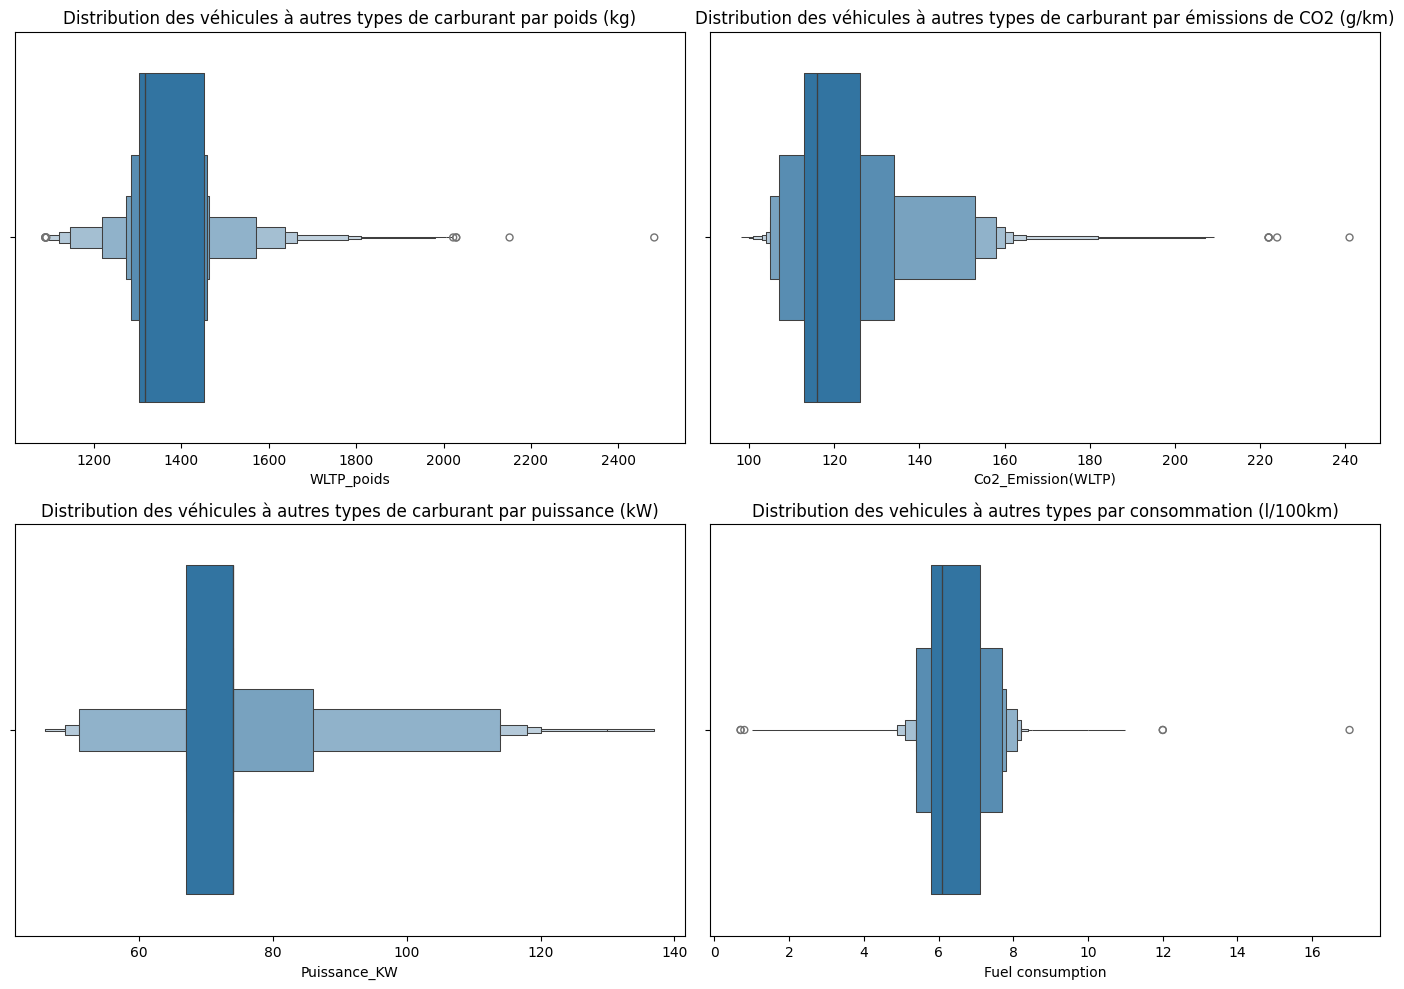

In [85]:
colonnes = ['WLTP_poids', 'Co2_Emission(WLTP)', 'Puissance_KW','Fuel consumption']
titres = [
    'Distribution des véhicules à autres types de carburant par poids (kg)',
    'Distribution des véhicules à autres types de carburant par émissions de CO2 (g/km)',
    'Distribution des véhicules à autres types de carburant par puissance (kW)',
    'Distribution des vehicules à autres types par consommation (l/100km)'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.boxenplot(x=col, data=df_emissions_2024_autres_clean, ax=axes[i])
    axes[i].set_title(titres[i])

plt.tight_layout()
plt.show()

In [86]:
# recherhce des outliers WLTP Poids
df_emissions_2024_autres_clean[(df_emissions_2024_autres_clean['WLTP_poids'] < 1100)]
# poids des outliers est bien une voiture réel on va donc les garders.

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
4272522,159642122,KIA,PICANTO,1096.0,106.0,Autre,49.0,0.0,5.1,0.0,Italy,B,Q1_Léger,Q1_Faible
4274613,159644377,KIA,PICANTO,1096.0,106.0,Autre,49.0,0.0,5.1,0.0,Italy,B,Q1_Léger,Q1_Faible
4275434,159645245,KIA,PICANTO,1096.0,106.0,Autre,49.0,0.0,5.1,0.0,Italy,B,Q1_Léger,Q1_Faible
4277662,159647622,KIA,PICANTO,1096.0,106.0,Autre,49.0,0.0,5.1,0.0,Italy,B,Q1_Léger,Q1_Faible
4278943,159649001,KIA,PICANTO,1096.0,106.0,Autre,49.0,0.0,5.1,0.0,Italy,B,Q1_Léger,Q1_Faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025983,160921938,KIA,PICANTO,1096.0,106.0,Autre,49.0,0.0,5.1,0.0,Italy,B,Q1_Léger,Q1_Faible
10026844,160922856,KIA,PICANTO,1096.0,106.0,Autre,49.0,0.0,5.1,0.0,Italy,B,Q1_Léger,Q1_Faible
10029076,160925224,KIA,PICANTO,1096.0,106.0,Autre,49.0,0.0,5.1,0.0,Italy,B,Q1_Léger,Q1_Faible
10029441,160925618,KIA,PICANTO,1096.0,106.0,Autre,49.0,0.0,5.1,0.0,Italy,B,Q1_Léger,Q1_Faible


In [87]:
df_emissions_2024_autres_clean[(df_emissions_2024_autres_clean['WLTP_poids'] > 2000)]
# volkswaggen Caddy valeur aberrante car 400 kg au dessus de son poids a vide.
# idem pour dacia duster
# idem pour peugeot boxer

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
107810,142185524,VOLKSWAGEN,CADDY,2014.0,129.0,Autre,96.0,0.0,7.2,0.0,Sweden,C,Q4_Très_lourd,Q2_Moyen
1987149,141991600,VOLKSWAGEN,CADDY,2014.0,129.0,Autre,96.0,0.0,7.2,0.0,Sweden,C,Q4_Très_lourd,Q2_Moyen
1993381,141998309,VOLKSWAGEN,CADDY,2014.0,129.0,Autre,96.0,0.0,7.2,0.0,Sweden,C,Q4_Très_lourd,Q2_Moyen
4792945,137648026,VOLKSWAGEN,CADDY,2022.0,129.0,Autre,96.0,0.0,8.0,0.0,Finland,C,Q4_Très_lourd,Q2_Moyen
4821802,137676913,VOLKSWAGEN,CADDY,2018.0,129.0,Autre,96.0,0.0,8.0,0.0,Finland,C,Q4_Très_lourd,Q2_Moyen
4859974,141939401,VOLKSWAGEN,CADDY,2013.0,129.0,Autre,96.0,0.0,7.2,0.0,Sweden,C,Q4_Très_lourd,Q2_Moyen
5269995,137635829,VOLKSWAGEN,CADDY,2016.0,129.0,Autre,96.0,0.0,8.0,0.0,Finland,C,Q4_Très_lourd,Q2_Moyen
5657758,142015279,VOLKSWAGEN,CADDY,2029.0,129.0,Autre,96.0,0.0,7.2,0.0,Sweden,C,Q4_Très_lourd,Q2_Moyen
6406851,142109906,VOLKSWAGEN,CADDY,2029.0,129.0,Autre,96.0,0.0,7.2,0.0,Sweden,C,Q4_Très_lourd,Q2_Moyen
6417706,142121571,VOLKSWAGEN,CADDY,2014.0,129.0,Autre,96.0,0.0,7.2,0.0,Sweden,C,Q4_Très_lourd,Q2_Moyen


In [88]:
# recherche outlier C02
df_emissions_2024_autres_clean[(df_emissions_2024_autres_clean['Co2_Emission(WLTP)'] > 220)]
# peugeot boxer valeur aberrante ID 157084324
# les autres représentent bien des valeurs réels.

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
8952401,157084324,PEUGEOT,BOXER,2482.0,241.0,Autre,103.0,0.0,9.2,0.0,Ireland,F,Q4_Très_lourd,Q3_Puissant
9442512,159313810,DFSK MOTOR,580,1681.0,222.0,Autre,107.0,0.0,8.1,0.0,Belgium,F,Q3_Lourd,Q3_Puissant
9593037,159269167,DFSK MOTOR,580,1681.0,222.0,Autre,107.0,0.0,8.1,0.0,Belgium,F,Q3_Lourd,Q3_Puissant
9601490,159277872,DFSK MOTOR,580,1681.0,222.0,Autre,107.0,0.0,8.1,0.0,Belgium,F,Q3_Lourd,Q3_Puissant
10037046,160933565,DFSK MOTOR,FENGON 5,1746.0,224.0,Autre,101.0,0.0,9.9,0.0,Slovakia,F,Q3_Lourd,Q3_Puissant


In [89]:
# recherche outlier Fuel Consumption
df_emissions_2024_autres_clean[(df_emissions_2024_autres_clean['Fuel consumption'] < 2)]
# toute valeurs aberrantes

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
7735618,158492787,DACIA,DUSTER,1413.0,143.0,Autre,67.0,0.0,1.0,0.0,Poland,D,Q2_Moyen,Q1_Faible
7812457,158471406,DACIA,DUSTER,1413.0,143.0,Autre,67.0,0.0,1.0,0.0,Poland,D,Q2_Moyen,Q1_Faible
8048957,156672549,RENAULT,CLIO,1335.0,109.0,Autre,67.0,0.0,0.7,0.0,Bulgaria,B,Q1_Léger,Q1_Faible
8069647,156693381,DACIA,JOGGER,1453.0,120.0,Autre,67.0,0.0,0.8,0.0,Bulgaria,B,Q2_Moyen,Q1_Faible
8088572,156712442,RENAULT,CLIO,1317.0,108.0,Autre,67.0,0.0,0.7,0.0,Bulgaria,B,Q1_Léger,Q1_Faible
8251834,158763443,RENAULT,CAPTUR,1432.0,134.0,Autre,67.0,0.0,1.0,0.0,Poland,C,Q2_Moyen,Q1_Faible
8260646,158772454,DACIA,JOGGER,1377.0,134.0,Autre,67.0,0.0,1.0,0.0,Poland,C,Q1_Léger,Q1_Faible
8310431,158673346,DACIA,DUSTER,1413.0,143.0,Autre,74.0,0.0,1.0,0.0,Poland,D,Q2_Moyen,Q1_Faible
8335213,158598745,RENAULT,CAPTUR,1432.0,134.0,Autre,67.0,0.0,1.0,0.0,Poland,C,Q2_Moyen,Q1_Faible
8378763,158793282,DACIA,DUSTER,1413.0,143.0,Autre,67.0,0.0,1.0,0.0,Poland,D,Q2_Moyen,Q1_Faible


In [90]:
df_emissions_2024_autres_clean[(df_emissions_2024_autres_clean['Fuel consumption'] >= 12)]
# valeurs aberrantes.

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
2652695,149746663,DACIA,SANDERO,1306.0,114.0,Autre,74.0,0.0,17.0,0.0,Greece,B,Q1_Léger,Q1_Faible
7806643,158465462,DACIA,JOGGER,1377.0,134.0,Autre,67.0,0.0,12.0,0.0,Poland,C,Q1_Léger,Q1_Faible
8293339,158655900,DACIA,DUSTER,1413.0,143.0,Autre,67.0,0.0,12.0,0.0,Poland,D,Q2_Moyen,Q1_Faible


# Analyse des boites a moustaches et nettoyage des outliers.

**Poids**

On consate la présence d'outliers a moins de 1100kg et à plus de 2000kg. Les valeurs à moins de 1100kg représentent bien des valeurs réels que l'on va garder, tandis que ceux a plus de 2000 kg representent des valeurs aberrantes que l'on va drop.


**Emissions de CO2**

On remarque la présence d'outliers au dessus de 220g/km de CO2. Il y a une valeur aberrante qui est la peugeot boxer ID ( 157084324) le reste des données represente bien des valeurs réels que l'on decide de garder suite a une verification internet.

**Puissance KW**

pas de presence d'outlier.

**Consommation (L/100KM)**

On remarque la présence d'outliers à moins de 2l/100km et a plus ou egal à 12l/100km. Dans les deux cas ce sont des valeurs aberrantes que l'on decide de drop.





In [91]:
# DROP DES OUTLIERS
df_emissions_2024_autres_clean=df_emissions_2024_autres_clean.drop(df_emissions_2024_autres_clean[(df_emissions_2024_autres_clean['WLTP_poids'] > 2000)].index)
df_emissions_2024_autres_clean=df_emissions_2024_autres_clean.drop(df_emissions_2024_autres_clean[(df_emissions_2024_autres_clean['ID'] == 157084324)].index)
df_emissions_2024_autres_clean=df_emissions_2024_autres_clean.drop(df_emissions_2024_autres_clean[(df_emissions_2024_autres_clean['Fuel consumption'] < 2)].index)
df_emissions_2024_autres_clean=df_emissions_2024_autres_clean.drop(df_emissions_2024_autres_clean[(df_emissions_2024_autres_clean['Fuel consumption'] >= 12)].index)

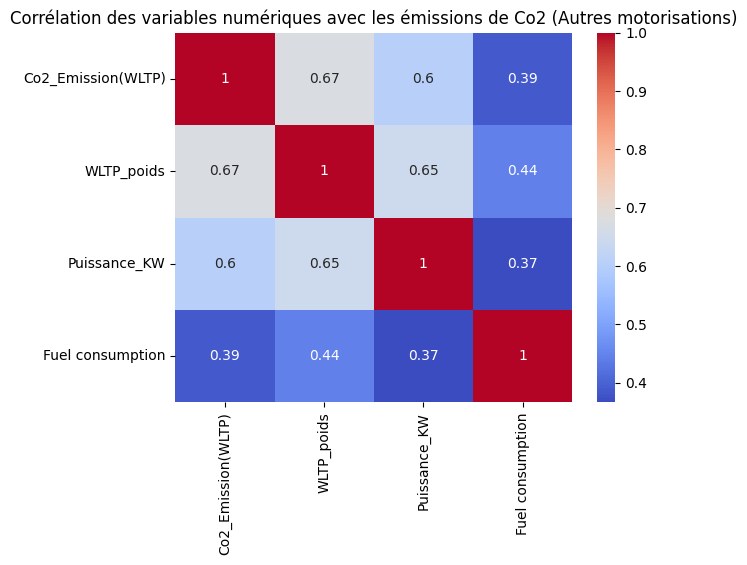

In [92]:
numeric_vars_autres = ['Co2_Emission(WLTP)', 'WLTP_poids', 'Puissance_KW', 'Fuel consumption']
corr_matrix = df_emissions_2024_autres_clean[numeric_vars_autres].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation des variables numériques avec les émissions de Co2 (Autres motorisations)')
plt.show()

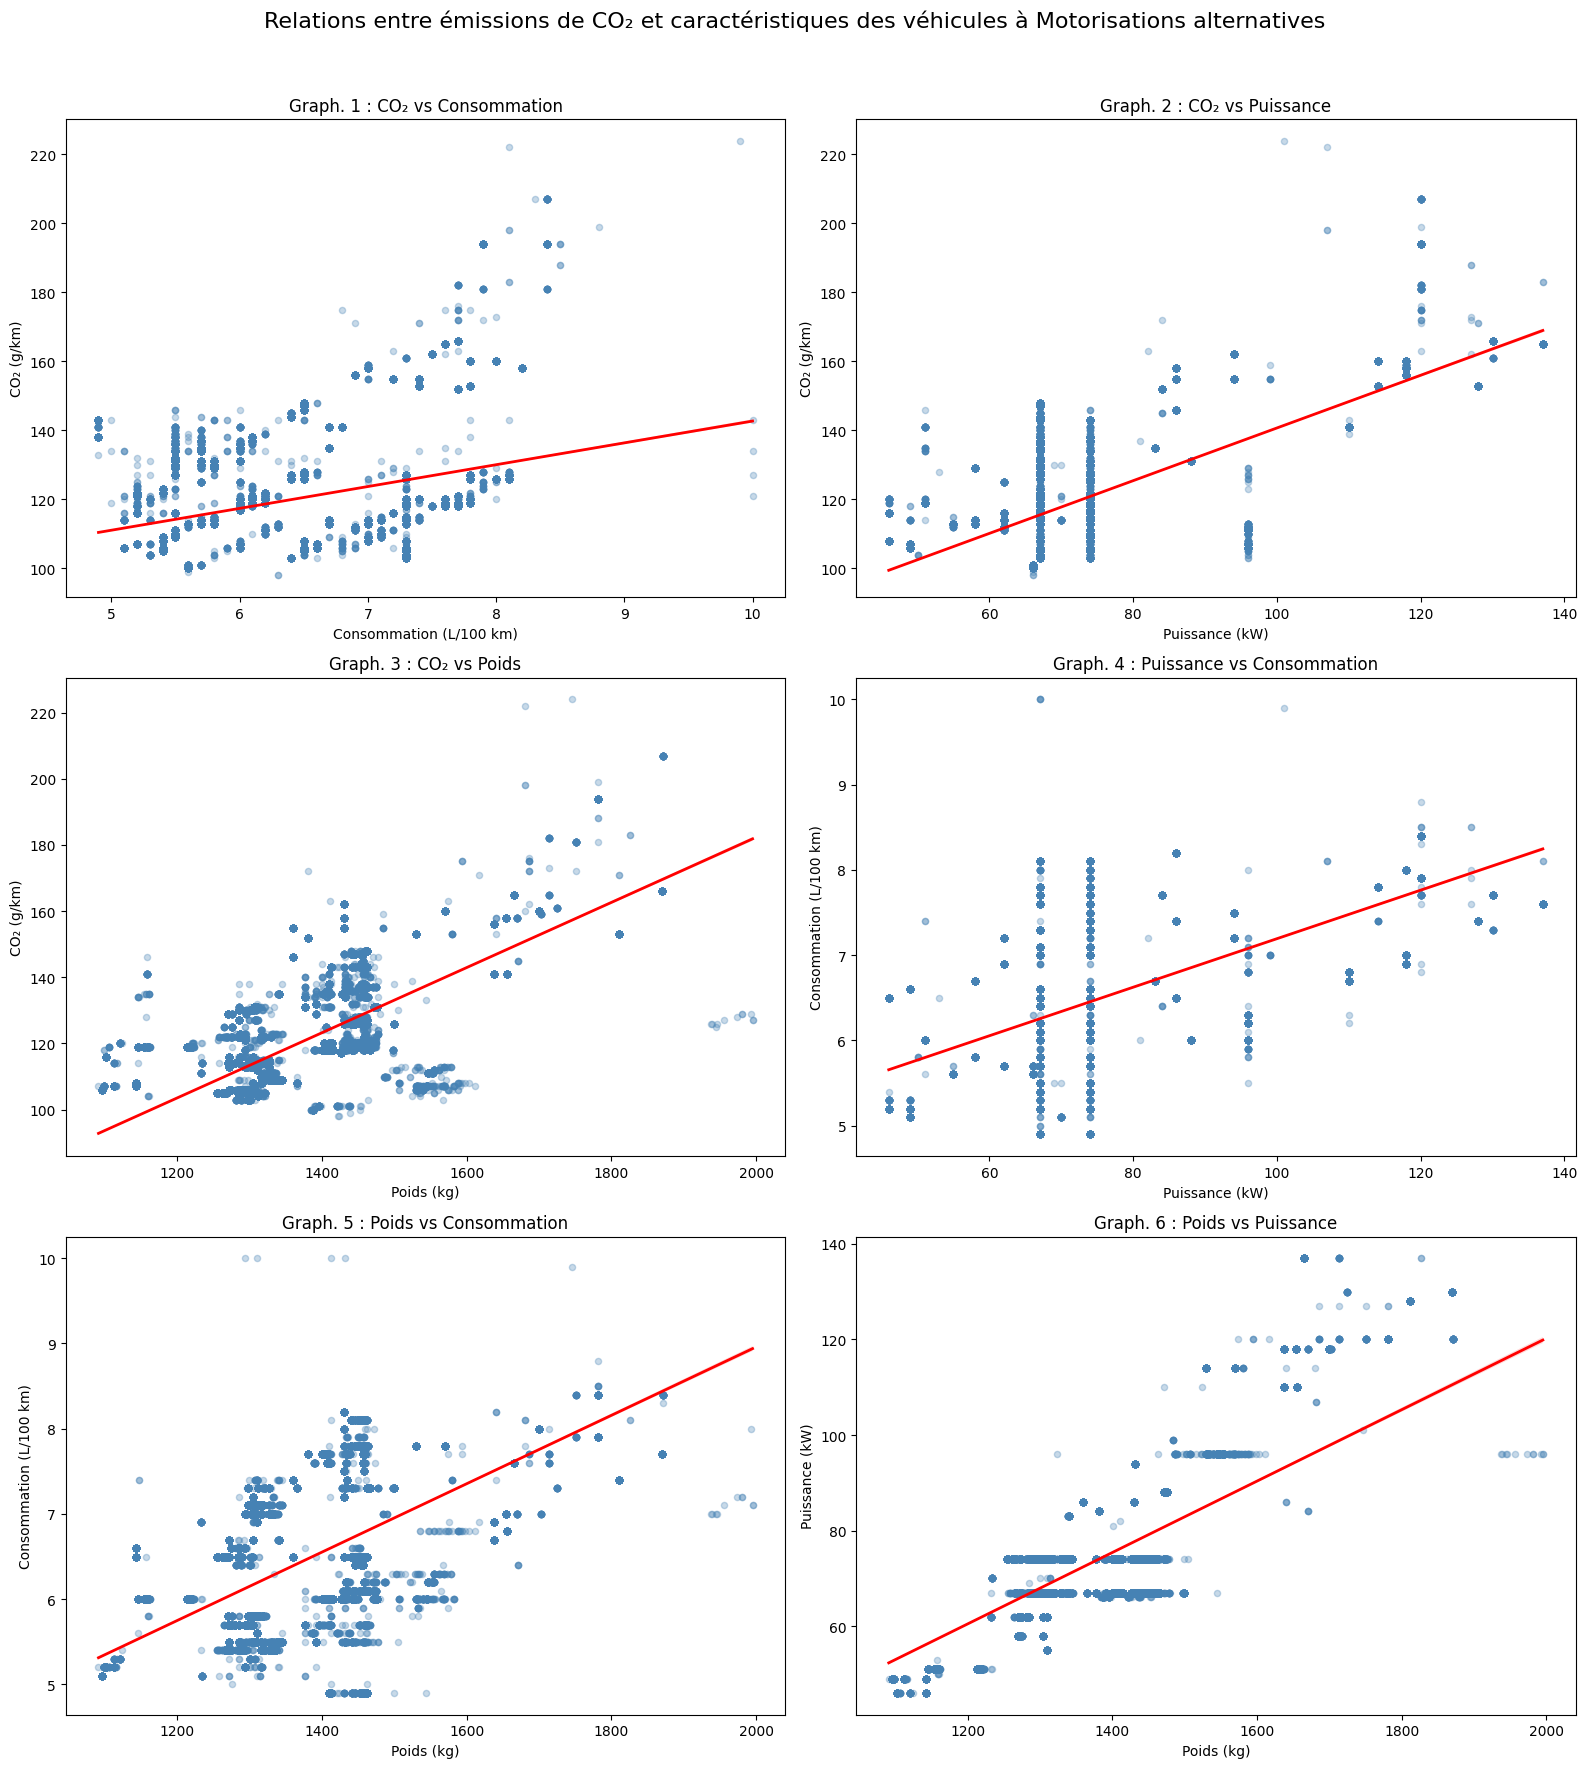

In [93]:
#Nuages de points avec droite de régression linéaire pour les véhicules à autres motorisations

df_sample = df_emissions_2024_autres_clean.sample(100000)

# Création de la figure et de la grille
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

fig.suptitle(
    "Relations entre émissions de CO₂ et caractéristiques des véhicules à Motorisations alternatives",
    fontsize=16
)

# Graphique 1 : CO2 vs Consommation
sns.regplot(
    x='Fuel consumption',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 0]
)
axes[0, 0].set_title('Graph. 1 : CO₂ vs Consommation')
axes[0, 0].set_xlabel('Consommation (L/100 km)')
axes[0, 0].set_ylabel('CO₂ (g/km)')

# Graphique 2 : CO2 vs Puissance
sns.regplot(
    x='Puissance_KW',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 1]
)
axes[0, 1].set_title('Graph. 2 : CO₂ vs Puissance')
axes[0, 1].set_xlabel('Puissance (kW)')
axes[0, 1].set_ylabel('CO₂ (g/km)')

# Graphique 3 : CO2 vs Poids
sns.regplot(
    x='WLTP_poids',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 0]
)
axes[1, 0].set_title('Graph. 3 : CO₂ vs Poids')
axes[1, 0].set_xlabel('Poids (kg)')
axes[1, 0].set_ylabel('CO₂ (g/km)')

# Graphique 4 : Puissance vs Consommation
sns.regplot(
    x='Puissance_KW',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 1]
)
axes[1, 1].set_title('Graph. 4 : Puissance vs Consommation')
axes[1, 1].set_xlabel('Puissance (kW)')
axes[1, 1].set_ylabel('Consommation (L/100 km)')

# Graphique 5 : Poids vs Consommation

sns.regplot(
    x='WLTP_poids',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 0]
)
axes[2, 0].set_title('Graph. 5 : Poids vs Consommation')
axes[2, 0].set_xlabel('Poids (kg)')
axes[2, 0].set_ylabel('Consommation (L/100 km)')

# Graphique 6 : Poids vs Puissance
sns.regplot(
    x='WLTP_poids',
    y='Puissance_KW',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 1]
)
axes[2, 1].set_title('Graph. 6 : Poids vs Puissance')
axes[2, 1].set_xlabel('Poids (kg)')
axes[2, 1].set_ylabel('Puissance (kW)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Visualisations Europe


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio

In [95]:
data_visu_clean = pd.read_parquet(r"/content/drive/MyDrive/Data_Co2_Clean_AVEC_OUTLIERS_BEFORE_SAMPLE")

In [96]:
len(data_visu_clean)

10117232

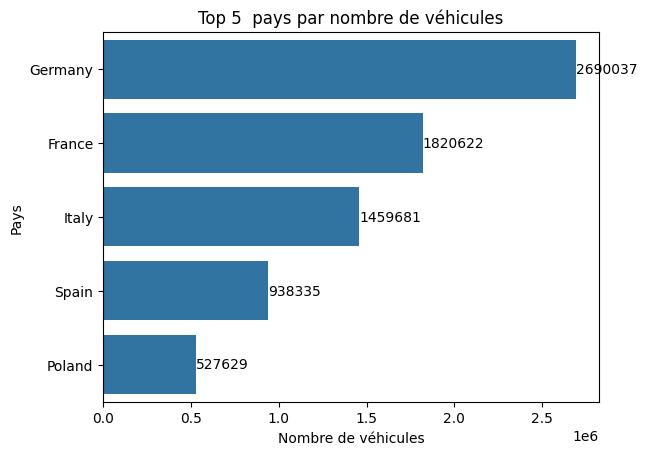

In [97]:
#Nombre de vehicules homologués par pays
Visu_country =sns.countplot( y = 'Pays' , data = data_visu_clean, order = data_visu_clean['Pays'].value_counts(ascending=False).iloc[:5].index)
abs_values = data_visu_clean['Pays'].value_counts(ascending=False).iloc[:5].values
Visu_country.bar_label(container=Visu_country.containers[0], labels=abs_values)
plt.title("Top 5  pays par nombre de véhicules")
plt.xlabel("Nombre de véhicules")
plt.ylabel("Pays")
plt.show()

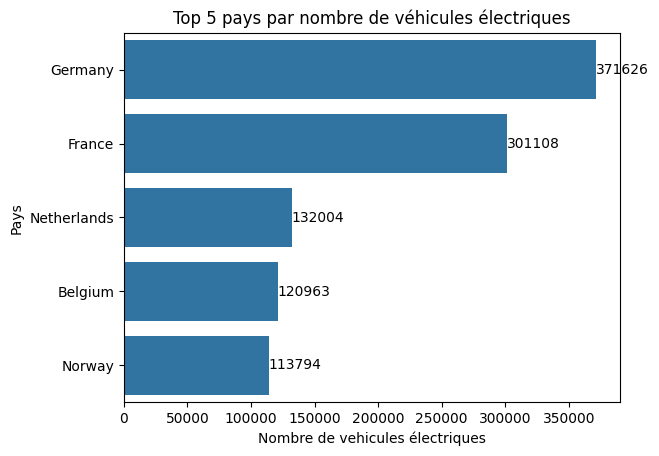

In [98]:
# nombre de véhicules électriques homologuées par pays
electric_df = data_visu_clean[data_visu_clean['Type_Carburant'] == 'Electric']

Visu_country_elec = sns.countplot(y='Pays',data=electric_df,order=electric_df['Pays'].value_counts(ascending=False).iloc[:5].index)

abs_values = electric_df['Pays'].value_counts(ascending=False).iloc[:5].values

Visu_country_elec.bar_label(container=Visu_country_elec.containers[0],labels=abs_values)

plt.title("Top 5 pays par nombre de véhicules électriques")
plt.xlabel("Nombre de vehicules électriques")
plt.ylabel("Pays")
plt.show()

In [99]:
# creation d'un graphique a bar visualisant les moyennes de CO₂ par pays
avg_co2_pays = (
    data_visu_clean
    .groupby("Pays")["Co2_Emission(WLTP)"]
    .mean()
    .round(2)
    .reset_index(name = "Avg_Co2")
    .sort_values(by = "Avg_Co2", ascending=True)
)

fig_avg_co2_pays = px.bar(avg_co2_pays,
                    x = "Pays",
                    y = "Avg_Co2",
                    text_auto= True,
                    color = "Pays"
                    )

fig_avg_co2_pays.show()

In [100]:
# création de la carte européene avec moyenne de CO₂
fig_choro = go.Figure()

fig_choro.add_trace(
    go.Choropleth(
        locations=avg_co2_pays["Pays"],
        locationmode="country names",
        z=avg_co2_pays["Avg_Co2"],
        colorbar_title="CO₂ moyen (g/km)",
        text="Avg_Co2",
        marker_line_color = "black",
        marker_line_width=0.5,
        colorscale= "ylgn"
        )
)

fig_choro.update_layout(
    title=f"Émissions moyennes de CO₂",
    geo=dict(
        scope="europe",
        projection_type="natural earth",
        showlakes=True,
        lakecolor="LightBlue",
        ),
        width = 1000,
        margin=dict(r=10, t=80, l=10, b=10),
        height=700,



)

fig_choro.update_geos(fitbounds="locations", visible=True)

fig_choro.show()

In [101]:
# création d'un graphique à bar avec moyennes de poids par pays
avg_poids_pays = (
    data_visu_clean
    .groupby("Pays")["WLTP_poids"]
    .mean()
    .round(2)
    .reset_index(name = "Avg_poids")
    .sort_values(by = "Avg_poids", ascending=True)
)

fig_avg_Poids_pays = px.bar(avg_poids_pays,
                    x = "Pays",
                    y = "Avg_poids",
                    text_auto= True,
                    color = "Pays"
                    )

fig_avg_Poids_pays.show()

In [102]:
# création de la carte européene avec moyennes de poids
fig_choro = go.Figure()

fig_choro.add_trace(
    go.Choropleth(
        locations=avg_poids_pays["Pays"],
        locationmode="country names",
        z=avg_poids_pays["Avg_poids"],
        colorbar_title="Poids moyen (kg)",
        text="Avg_poids",
        marker_line_color = "black",
        marker_line_width=0.5,
        colorscale= "ylgn"
        )
)

fig_choro.update_layout(
    title=f"Poids moyen kg",
    geo=dict(
        scope="europe",
        projection_type="natural earth",
        showlakes=True,
        lakecolor="LightBlue",
        ),
        width = 1000,
        margin=dict(r=10, t=80, l=10, b=10),
        height=700,



)

fig_choro.update_geos(fitbounds="locations", visible=True)

fig_choro.show()

In [103]:
# dataframe nouveau pour repartition des carburants
data = pd.read_parquet(r"/content/drive/MyDrive/Data_Co2_Clean_AVEC_OUTLIERS_BEFORE_SAMPLE")
display(data.head())

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
0,148534149,FORD,FOCUS,1523.0,121.0,Essence,92.0,0.0,5.3,0.0,Netherlands,C,Q2_Moyen,Q2_Moyen
1,148534150,OPEL,VIVARO,2454.0,0.0,Electric,100.0,244.0,0.0,343.0,Netherlands,A,Q4_Très_lourd,Q2_Moyen
2,148534151,VOLVO,S60,2176.0,16.0,Hybride Essence,186.0,163.0,0.7,93.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
3,148534152,FORD,FOCUS,1549.0,123.0,Essence,92.0,0.0,5.4,0.0,Netherlands,C,Q2_Moyen,Q2_Moyen
4,148534153,TOYOTA,TOYOTA AYGO X,1088.0,108.0,Essence,53.0,0.0,4.8,0.0,Netherlands,B,Q1_Léger,Q1_Faible


In [104]:
# creation du graphique à bars pour les repartion de type de carburant par pays
type_by_country = data.groupby(["Pays","Type_Carburant"])["Type_Carburant"].size().unstack().sort_values(by = "Pays", ascending=True)
type_by_country = type_by_country.fillna(0)


display(type_by_country)



fig_tc = px.bar(
    type_by_country,
    x=type_by_country.index,
    y=type_by_country.columns,
    title="Répartition des types de carburant par pays"
)

fig_tc.update_layout(
    barmode="stack",
    xaxis_title="Pays",
    yaxis_title="Nombre de véhicules"
)

fig_tc.show()

Type_Carburant,Autre,Diesel,Electric,Essence,Hybride Diesel,Hybride Essence
Pays,,,,,,
Austria,13.0,56102.0,44436.0,135266.0,1865.0,15013.0
Belgium,3458.0,21381.0,120963.0,225580.0,2263.0,61511.0
Bulgaria,3665.0,6897.0,1742.0,27890.0,28.0,1492.0
Croatia,1399.0,14427.0,1716.0,45490.0,118.0,1352.0
Cyprus,0.0,1.0,0.0,0.0,0.0,0.0
Czech Republic,4778.0,55580.0,10738.0,150747.0,311.0,5510.0
Estonia,462.0,5631.0,1299.0,16738.0,26.0,1240.0
Finland,114.0,1616.0,21772.0,33387.0,196.0,14662.0
France,58939.0,156559.0,301108.0,1155455.0,7019.0,141542.0
